In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_table("./result/pagerank.txt")
hist_a = pd.read_table("./result/hits_a.txt")
hist_h = pd.read_table("./result/hits_h.txt")
data['h'] = hist_h['h']
data['a'] = hist_a['a']
data

,id,pagerank,h,a
0,8517910,1.467260e-07,2.156316e-07,-0.000000e+00
1,50567111,8.382982e-07,-7.902866e-20,3.431501e-06
2,61306948,1.704624e-07,-0.000000e+00,2.669589e-09
3,60854565,2.072571e-07,-0.000000e+00,4.497911e-10
4,57724193,1.601512e-07,-0.000000e+00,4.534575e-11
...,...,...,...,...
3957106,90369758,1.580314e-07,-0.000000e+00,1.965556e-11
3957107,72910664,1.580314e-07,-0.000000e+00,1.965556e-11
3957108,72599709,1.580314e-07,-0.000000e+00,1.965556e-11
3957109,34569793,1.580314e-07,-0.000000e+00,1.965556e-11


In [4]:
data.iloc[:,1:].describe()

,pagerank,h,a
count,3.957111e+06,3.957111e+06,3.957111e+06
mean,2.527096e-07,2.527096e-07,2.527096e-07
std,7.159360e-06,9.017240e-06,8.493623e-07
min,1.467260e-07,-9.433406e-18,-8.096122e-18
25%,1.467482e-07,-5.410321e-23,1.415745e-11
50%,1.474529e-07,0.000000e+00,5.821920e-09
75%,1.531677e-07,-0.000000e+00,8.674424e-08
max,5.862306e-03,9.376403e-03,1.212056e-04


In [5]:
delta = 1

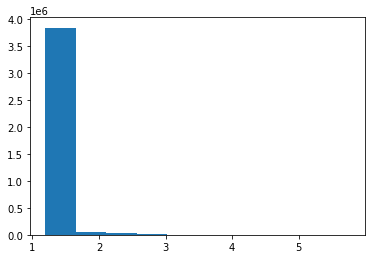

In [6]:
plt.hist(np.log10(data['pagerank']*10e7+delta))
plt.show()

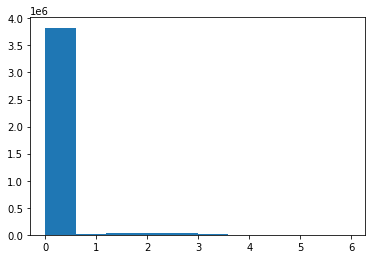

In [7]:
plt.hist(np.log10(data['h']*10e7+delta))
plt.show()

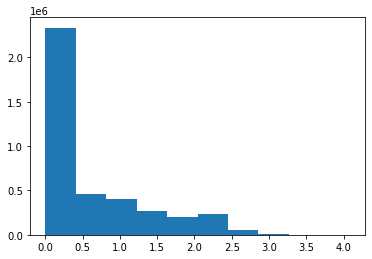

In [8]:
plt.hist(np.log10(data['a']*10e7+delta))
plt.show()

In [9]:
def mainpage(id):
    sql = "select login from ods_github_users where database_id = %s" % id
    with o.execute_sql(sql).open_reader() as reader:
        for record in reader:
            return "https://github.com/" + record.login

In [10]:
data.sort_values(by = 'pagerank').tail(5)

,id,pagerank,h,a
2513522,14808551,0.003446,0.000123,-3.477674e-18
3228517,74522790,0.003875,0.000143,-3.562348e-18
2310471,9830365,0.004075,0.000130,-2.211579e-18
2070535,552936,0.004829,0.000111,-8.096122e-18
1510876,250445,0.005862,0.000109,2.289044e-18


In [11]:
for user_id in data.sort_values(by = 'pagerank').tail(5)['id']:
    print(user_id, end=" ")
    print(mainpage(user_id))

14808551 https://github.com/Lisprez
74522790 https://github.com/snowwhite-boss
9830365 https://github.com/dplewis
552936 https://github.com/mbautin
250445 https://github.com/batermj


In [12]:
for user_id in data.sort_values(by = 'h').tail(5)['id']:
    print(user_id, end=" ")
    print(mainpage(user_id))

170270 https://github.com/sindresorhus
905434 https://github.com/ruanyf
810438 https://github.com/gaearon
499550 https://github.com/yyx990803
1024025 https://github.com/torvalds


In [13]:
for user_id in data.sort_values(by = 'a').tail(5)['id']:
    print(user_id, end=" ")
    print(mainpage(user_id))

250445 https://github.com/batermj
3076393 None
5877145 None
43415053 None
14808551 https://github.com/Lisprez
